(lecture09-bernoulli-distribution)=
# The Bernoulli distribution

We are now going to generalize the coin toss experiment.
Imagine an experiment with two outcomes $0$ or $1$.
You can think of $0$ as "failure" and $1$ as "success".
Now assume that the experiment is successful with probability $\theta$, which
is some number between $0$ and $1$.
For example, for a fair coin $\theta=0.5$.
But here we allow for any value.
The result of such an experiment is captured by the following random variable:

$$
X = \begin{cases}
1,\;\text{with probability}\;\theta,\\
0,\;\text{otherwise}.
\end{cases}
$$

In terms of the probability mass function, we have:

$$
p(X=0) = \theta,
$$

and

$$
p(X=1) = 1 - \theta.
$$

This random variable has a special name.
It is called a Bernoulli random variable, named after [Jacob Bernoulli](https://en.wikipedia.org/wiki/Jacob_Bernoulli).
Another say that $X$ is a Bernoulli random variable is to write:

$$
X\sim \text{Bernoulli}(\theta).
$$

which is read as:

> The random variable $X$ *follows* a Bernoulli *distribution* with parameter
> $\theta$.

This is enough information to figure out what the probability mass function is.
For example, with a Google search "Bernoulli distribution" you can get
[here](https://en.wikipedia.org/wiki/Bernoulli_distribution).

In [29]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np

Let's use the functionality of ``scipy.stats`` to define a Bernoulli random variable and sample from it:

In [30]:
import scipy.stats as st

I will pick $\theta=0.6$:

In [31]:
theta = 0.6
X = st.bernoulli(theta)

This objects encapsulates everything related to the random variable $X$.
For example, `X.support()` tells you which values it takes:

In [32]:
X.support()

(0, 1)

To evaluate the probability mass function you can use:

In [33]:
X.pmf(0)

0.3999999999999999

In [34]:
X.pmf(1)

0.6

Finally, you can use `X.rvs()` to generate samples from this random variable.

In [35]:
for i in range(10):
    print(X.rvs())

0
1
1
1
1
1
0
1
0
1


If you want to take many samples at once, here is how:

In [36]:
X.rvs(1000)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,

Let's now take many samples and do their histogram:

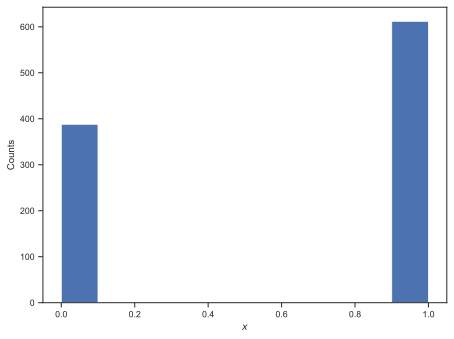

In [37]:
fig, ax = make_full_width_fig()
xs = X.rvs(size=1000)
ax.hist(xs)
ax.set_xlabel('$x$')
ax.set_ylabel('Counts')
save_for_book(fig, 'ch9.fig1')

## Questions

+ Rerun the code above with $\theta=0.8$.